In [1]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Cropping2D
from tensorflow.keras.datasets import mnist
import matplotlib.pyplot as plt
from tensorflow.keras.utils import to_categorical
import numpy as np

In [2]:
import pickle
import numpy as np
import os
from sklearn.model_selection import train_test_split

#pickle_in = open("X.pickle","rb")
pickle_in = open("/home/trojan/Desktop/dimentia/CNN_simple/kfold/X.pickle","rb")
X = pickle.load(pickle_in)

#pickle_in = open("y.pickle","rb")
pickle_in = open("/home/trojan/Desktop/dimentia/CNN_simple/kfold/y.pickle","rb")
y = pickle.load(pickle_in)

X = np.array(X)
y = np.array(y)

In [3]:
x_train, x_val, y_train, y_val = train_test_split(X, y,
                                                  shuffle=True, stratify=y, 
                                                  test_size=0.2, random_state=42)

In [5]:
num_classes = 2
y_train = to_categorical(y_train, num_classes)
y_val = to_categorical(y_val, num_classes)

In [7]:
input_image_shape = (256, 256, 3)
input_image = x_train[25].reshape(input_image_shape)

In [20]:
# Create the model
model = Sequential()
model.add(Cropping2D(cropping=((60, 66), (80, 76)), input_shape=input_image_shape))
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
cropping2d_2 (Cropping2D)    (None, 106, 106, 3)       0         
Total params: 0
Trainable params: 0
Non-trainable params: 0
_________________________________________________________________


In [21]:
# Perform actual cropping
model_inputs = np.array([input_image])
outputs_cropped = model.predict(model_inputs)

In [22]:
# Get output
outputs_cropped = outputs_cropped[0]

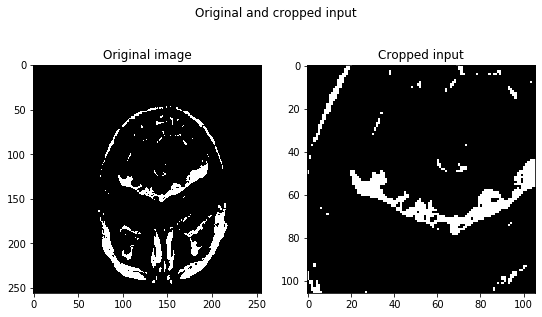

In [23]:
# Visualize input and output
fig, axes = plt.subplots(1, 2)
axes[0].imshow(input_image[:, :, 0], cmap='gray') 
axes[0].set_title('Original image')
axes[1].imshow(outputs_cropped[:, :, 0], cmap='gray')
axes[1].set_title('Cropped input')
fig.suptitle(f'Original and cropped input')
fig.set_size_inches(9, 5, forward=True)
plt.show()